In [1]:
%matplotlib inline
from typing import List, Optional
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, to_rgb
import seaborn as sns
from ipywidgets import interact, fixed, IntSlider, FloatSlider

# Choosing color palettes

This notebook is a Jupyter implementation of
"[Choosing color palettes](http://seaborn.pydata.org/tutorial/color_palettes.html)"(seaborn)
and also refers to 
"[Choosing Colormaps in Matplotlib](https://matplotlib.org/tutorials/colors/colormaps.html)".

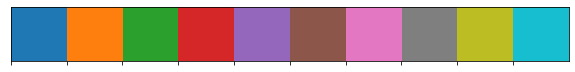

In [2]:
# Basic example
# If as_cmap is True, returns matplotlib.colors.Colormap
#     from seaborn 0.11.0 (Sep. 2020)
# desat = desaturate
sns.palplot(
    sns.color_palette(
        palette=None, n_colors=None, desat=None, as_cmap=False
    ), size=1
)

## Functions

In [3]:
color_palettes = {
    'qualitative': ' '.join([
        'deep muted pastel bright dark colorblind',  # seaborn
        'Pastel1 Pastel2 Paired Accent Dark2 Set1 Set2 Set3',  # matplotlib
        'tab10 tab20 tab20b tab20c',  # matplotlib default
    ]),
    'cyclic': ' '.join([
        'hls husl',  # seaborn
        'twilight twilight_shifted hsv'
    ]),
    'hue': 'hls husl',
    'perceptually': ' '.join([
        'rocket mako flare crest',  # seaborn
        'viridis plasma inferno magma cividis',  # matplotlib
    ]),
    'monotonically': ' '.join([
        'binary gist_yarg gist_gray gray bone pink',  # matplotlib
        'spring summer autumn winter cool Wistia',
        'hot afmhot gist_heat copper',
    ]),
    'diverging': ' '.join([
        'vlag icefire',  # seaborn (perceptually uniform)
        'PiYG PRGn BrBG PuOr RdGy RdBu',  # matplotlib (two colors)
        'RdYlBu RdYlGn Spectral coolwarm bwr seismic',  # matplotlib (three or more)
    ]),
}

In [4]:
def draw_color_palettes(
    palettes: List[str]
) -> None:
    fig, axes = plt.subplots(nrows=len(palettes), figsize=(6.4, len(palettes) * 0.4))
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    gradient = np.linspace(0, 1, 256)
    gradient = np.vstack((gradient, gradient))
    for ax, palette in zip(axes, palettes):
        cmap = sns.color_palette(
            palette=palette, as_cmap=True
        )
        if cmap.__class__.__name__ == 'list':
            cmap = LinearSegmentedColormap.from_list(
                name=palette, N=len(cmap),
                colors=[
                    to_rgb(x) for x in cmap
                ]
            )
        ax.imshow(gradient, aspect='auto', cmap=cmap)
        ax.set_axis_off()
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, palette, va='center', ha='right', fontsize=14)
    return

In [5]:
def draw_each_color_palette(
    palette: str,
    reverse: bool,
    n_colors: Optional[int],
    desaturation: Optional[float] = 1.0
) -> None:
    if reverse:
        palette += '_r'
    pal = sns.color_palette(
        palette=palette, n_colors=n_colors, desat=desaturation, as_cmap=False
    )
    fig, ax = plt.subplots(1, 1, figsize=(n_colors, 1))
    ax.imshow(
        np.arange(n_colors).reshape(1, n_colors),
        cmap=ListedColormap(list(pal)),
        interpolation='nearest', aspect='auto'
    )
    ax.set_xticks(np.arange(n_colors))
    ax.set_yticks([])
    ax.set_xticklabels([str(i) for i in range(n_colors)])
    ax.yaxis.set_major_locator(ticker.NullLocator())
    return

In [6]:
def draw_hue_color_palette(
    palette: str,
    n_colors: Optional[int],
    first_hue: Optional[float],
    lightness: Optional[float],
    saturation: Optional[float]
) -> None:
    pal = eval(f'sns.{palette}_palette')(
        n_colors=n_colors, h=first_hue, l=lightness, s=saturation, as_cmap=False
    )
    fig, ax = plt.subplots(1, 1, figsize=(n_colors, 1))
    ax.imshow(
        np.arange(n_colors).reshape(1, n_colors),
        cmap=ListedColormap(list(pal)),
        interpolation='nearest', aspect='auto'
    )
    ax.set_xticks(np.arange(n_colors))
    ax.set_yticks([])
    ax.set_xticklabels([str(i) for i in range(n_colors)])
    ax.yaxis.set_major_locator(ticker.NullLocator())
    return

## Qualitative Color Palettes

Use for representing categorical data

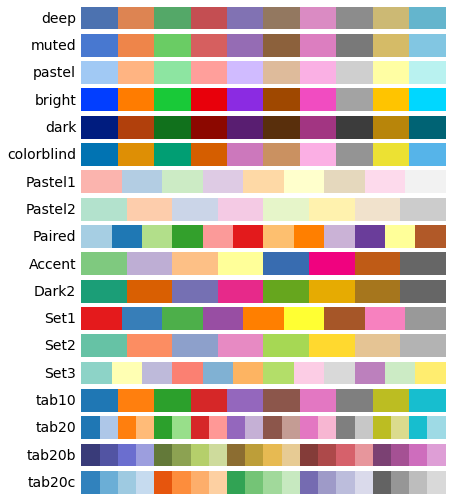

In [7]:
draw_color_palettes(palettes=color_palettes['qualitative'].split())

In [8]:
# Check color palette interactively
_ = interact(
    draw_each_color_palette,
    palette=color_palettes['qualitative'].split(),
    reverse=fixed(False),
    n_colors=IntSlider(min=1, max=48, step=1, value=10),
    desaturation=FloatSlider(min=0.0, max=1.0, step=0.01, value=1.0)
)

interactive(children=(Dropdown(description='palette', options=('deep', 'muted', 'pastel', 'bright', 'dark', 'c…

## Sequential Color Palettes

### Cyclic Color Palettes

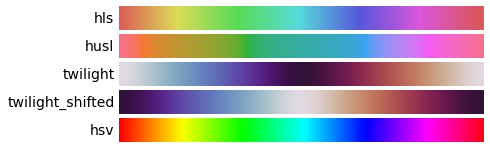

In [9]:
draw_color_palettes(palettes=color_palettes['cyclic'].split())

In [10]:
# Check color palette interactively
_ = interact(
    draw_each_color_palette,
    palette=color_palettes['cyclic'].split(),
    reverse=fixed(False),
    n_colors=IntSlider(min=1, max=48, step=1, value=10),
    desaturation=FloatSlider(min=0.0, max=1.0, step=0.01, value=1.0)
)

interactive(children=(Dropdown(description='palette', options=('hls', 'husl', 'twilight', 'twilight_shifted', …

In [11]:
# Adjust hue as you like
_ = interact(
    draw_hue_color_palette,
    palette=color_palettes['hue'].split(),
    n_colors=IntSlider(min=1, max=48, step=1, value=10),
    first_hue=FloatSlider(min=0.0, max=1.0, step=0.01, value=0.01),
    lightness=FloatSlider(min=0.0, max=1.0, step=0.01, value=0.6),
    saturation=FloatSlider(min=0.0, max=1.0, step=0.01, value=0.65)
)

interactive(children=(Dropdown(description='palette', options=('hls', 'husl'), value='hls'), IntSlider(value=1…

### Perceptually Uniform Color Palettes

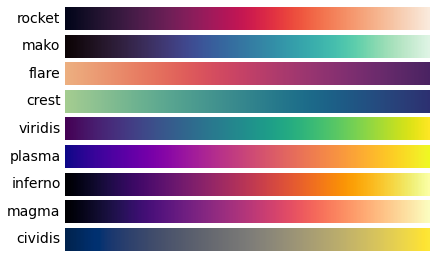

In [12]:
draw_color_palettes(palettes=color_palettes['perceptually'].split())

In [13]:
# Check color palette interactively
_ = interact(
    draw_each_color_palette,
    palette=color_palettes['perceptually'].split(),
    reverse=False,
    n_colors=IntSlider(min=1, max=48, step=1, value=10),
    desaturation=FloatSlider(min=0.0, max=1.0, step=0.01, value=1.0)
)

interactive(children=(Dropdown(description='palette', options=('rocket', 'mako', 'flare', 'crest', 'viridis', …

### Monotonically Increasing Color Palettes

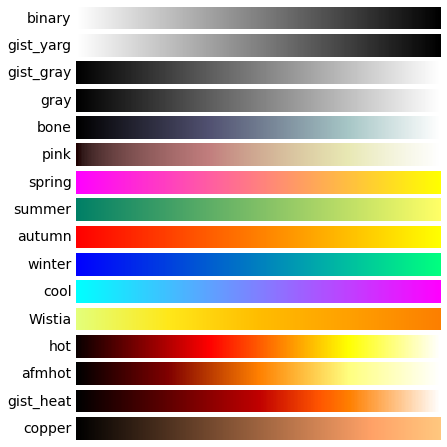

In [14]:
draw_color_palettes(palettes=color_palettes['monotonically'].split())

In [15]:
# Check color palette interactively
_ = interact(
    draw_each_color_palette,
    palette=color_palettes['monotonically'].split(),
    reverse=False,
    n_colors=IntSlider(min=1, max=48, step=1, value=10),
    desaturation=FloatSlider(min=0.0, max=1.0, step=0.01, value=1.0)
)

interactive(children=(Dropdown(description='palette', options=('binary', 'gist_yarg', 'gist_gray', 'gray', 'bo…

### Diverging Color Palettes

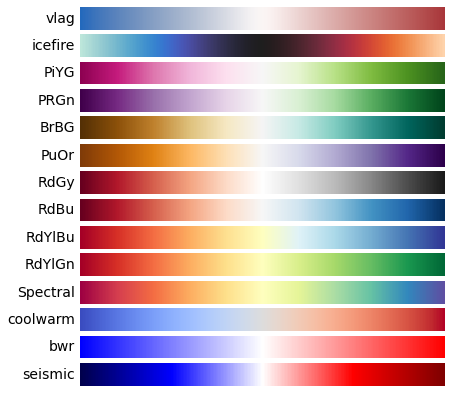

In [16]:
draw_color_palettes(palettes=color_palettes['diverging'].split())

In [17]:
# Check color palette interactively
_ = interact(
    draw_each_color_palette,
    palette=color_palettes['diverging'].split(),
    reverse=False,
    n_colors=IntSlider(min=1, max=48, step=1, value=10),
    desaturation=FloatSlider(min=0.0, max=1.0, step=0.01, value=1.0)
)

interactive(children=(Dropdown(description='palette', options=('vlag', 'icefire', 'PiYG', 'PRGn', 'BrBG', 'PuO…

### 連続カラーパレット (Sequencial color palettes)

In [ ]:
# 基本
sns.palplot(sns.color_palette("Blues"))
# dark
sns.palplot(sns.color_palette("Blues_d"))
# reverse
sns.palplot(sns.color_palette("Blues_r"))

In [ ]:
sns.choose_colorbrewer_palette('sequential');

### cubehelix_paletteを用いた連続カラーパレット (Sequential palettes with cubehelix_palette())

In [ ]:
# 基本
sns.palplot(sns.color_palette("cubehelix", 24))

In [ ]:
sns.palplot(sns.cubehelix_palette(24))

In [ ]:
def show_pal2(start, rot):
    sns.palplot(sns.cubehelix_palette(24, start=start, rot=rot))
interact(show_pal2, start=FloatSlider(max=1), rot=FloatSlider(0.4, max=1));

In [ ]:
sns.palplot(sns.light_palette("blue", 24))
sns.palplot(sns.dark_palette("blue", 24))

In [ ]:
def show_pal3(light_or_dark, color, reverse):
    sns.palplot(eval('sns.%s_palette'%light_or_dark)(color=color, n_colors=24, reverse=reverse))
interact(show_pal3, light_or_dark=('light', 'dark'), color=('blue', 'navy', 'green', 'palegreen', 'red'), reverse=False);

In [ ]:
sns.palplot(sns.diverging_palette(220, 20, n=24))
sns.palplot(sns.diverging_palette(145, 280, s=85, l=25, n=24))
sns.palplot(sns.diverging_palette(255, 133, l=60, n=24, center="dark"))

In [ ]:
def show_pal4(h_neg, h_pos, s, l, center):
    sns.palplot(sns.diverging_palette(h_neg, h_pos, n=24, s=s, l=l, center=center))
interact(show_pal4, h_neg=FloatSlider(220, max=360), h_pos=FloatSlider(20, max=360), 
         s=FloatSlider(75, max=99), l=FloatSlider(50, max=99), center=('light', 'dark'));